## Customer Segmentation and Analysis using K-means and Hierarchical Clustering Techniques

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

### Data Exploration

In [2]:
df = pd.read_csv('./Mall_Customers.csv.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Check for missing values in dataset

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

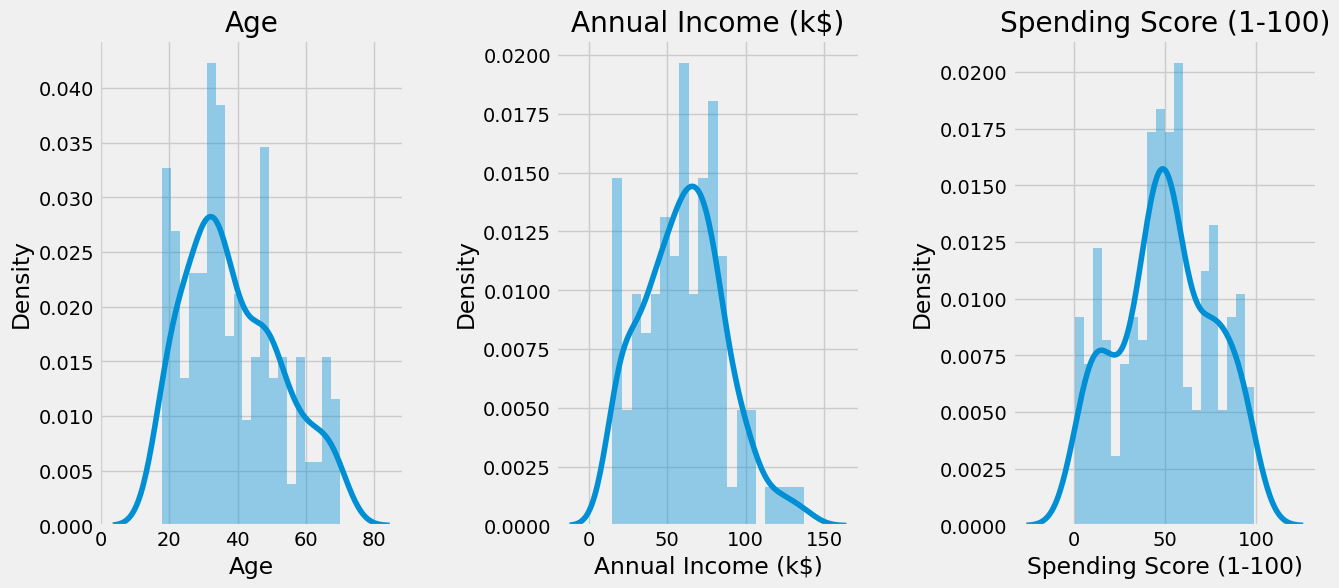

In [8]:
plt.figure(1 , figsize = (14 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('{}'.format(x))
plt.show()

### Count plot of Gender

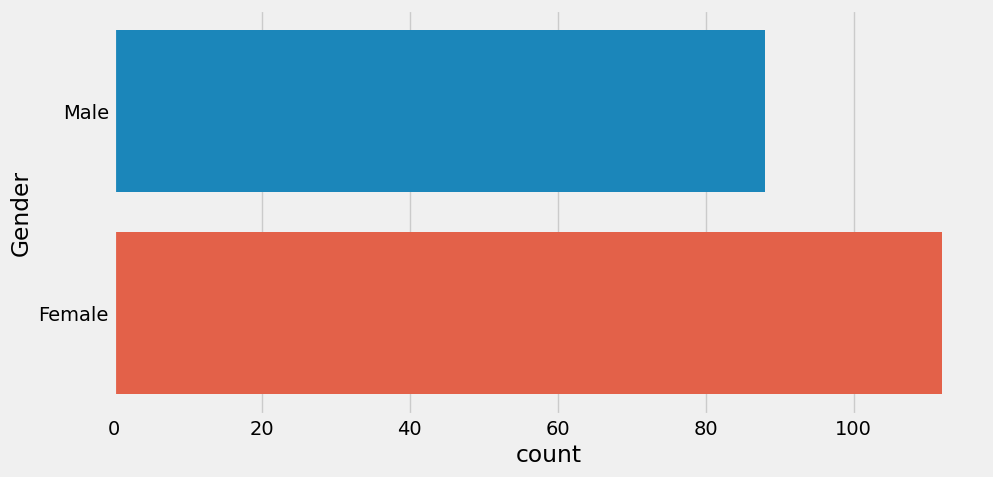

In [9]:
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

We can see that Female count is greater than male count from data.

### Ploting the Relation between Age , Annual Income and Spending Score

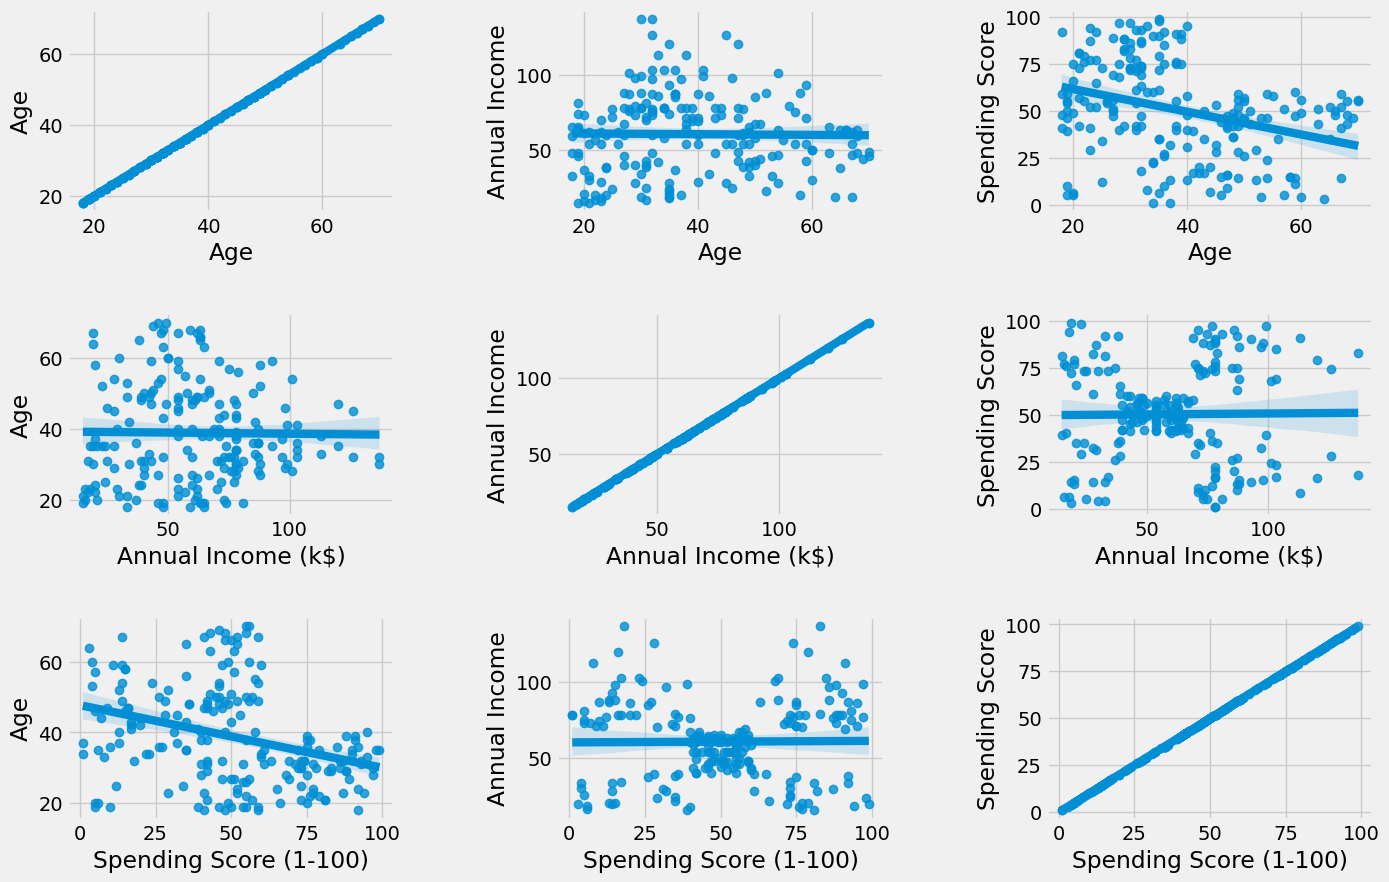

In [10]:
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Plot between Age and Annual Income w.r.to Gender

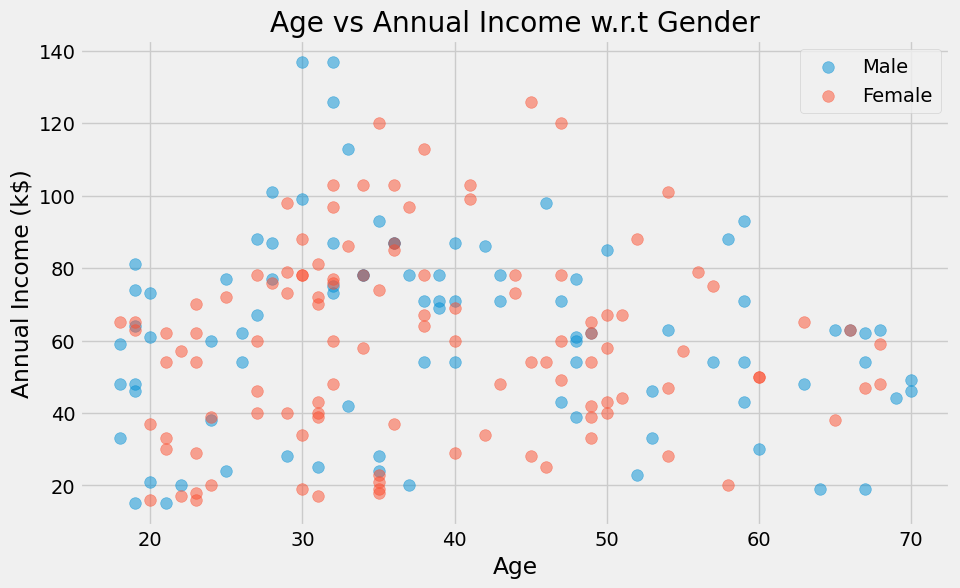

In [11]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 70 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

### Plot between Annual Income and Spending score w.r.to Gender

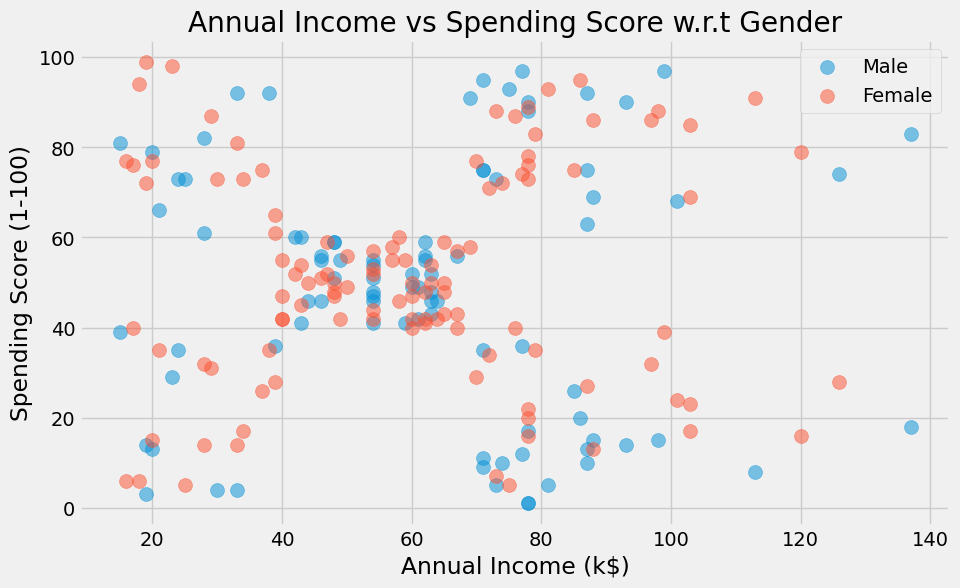

In [49]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 100 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

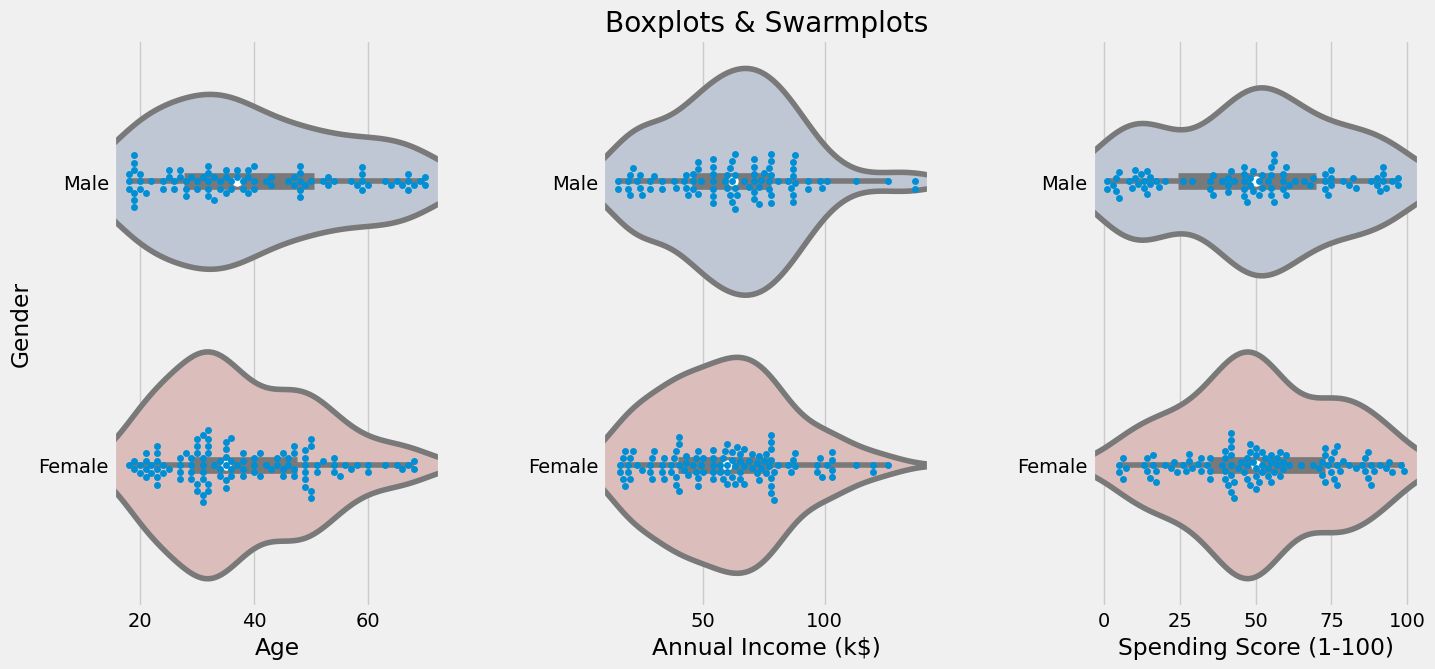

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K-means technique

Firstly, let's assume that Age and Spending Score columns could form clusters together, so let's just apply the fitting function at the class sklearn.Kmeans. The purpose here is to obtain as many values of cluster inertia as possible, selecting the closest value to the elbow of the inertia X cluster_number graph.

Based on the best cluster size, the model is updated and the labels are associated with each row on the dataset.

### 1. Segmentation using Age and Spending Score

In [14]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

#### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

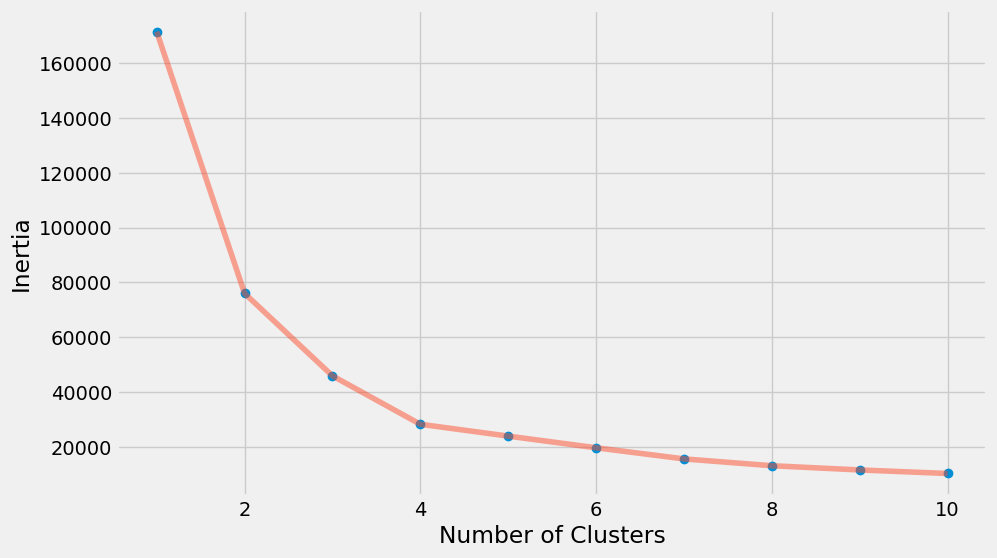

In [15]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Considerng 4 as cluster size from the plot as it's near to elbow.

In [16]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [17]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

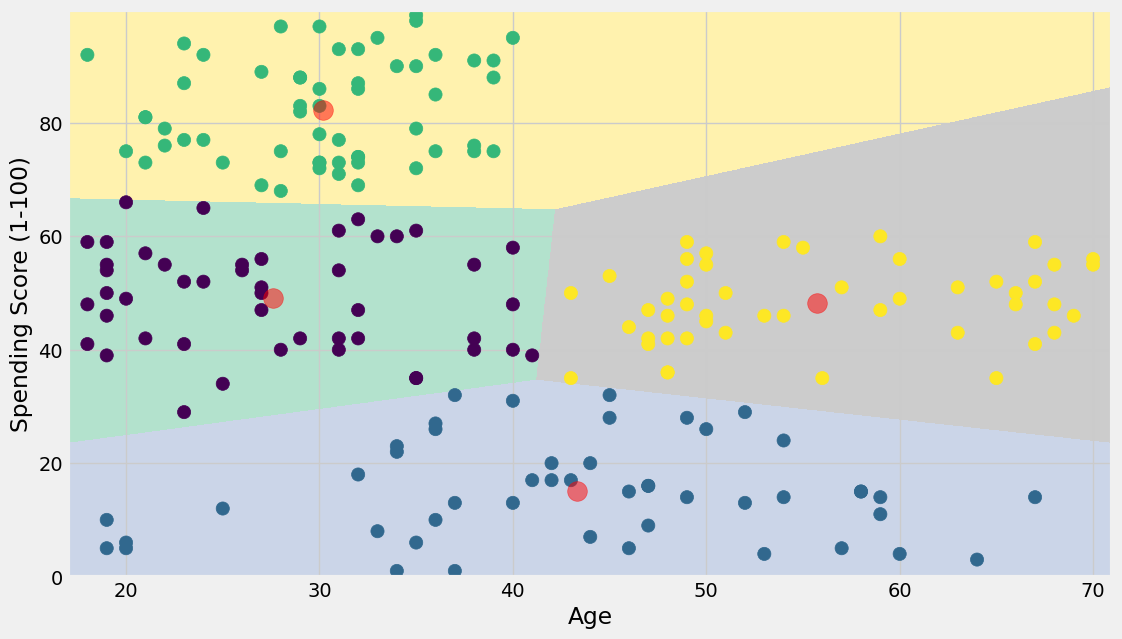

In [18]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 90 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Now, let's assume that Annual Income and Spending Score columns could form clusters together, so let's just apply the fitting function at the class sklearn.Kmeans.

### 2. Segmentation using Annual Income and Spending Score

In [19]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

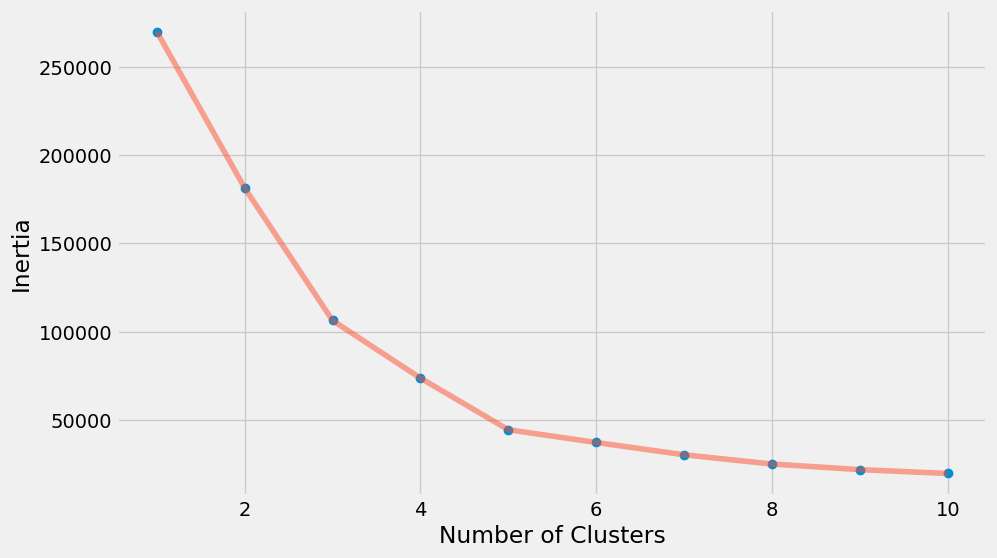

In [20]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Considering 5 as number of clusters as it's near to elbow.

In [41]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [42]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

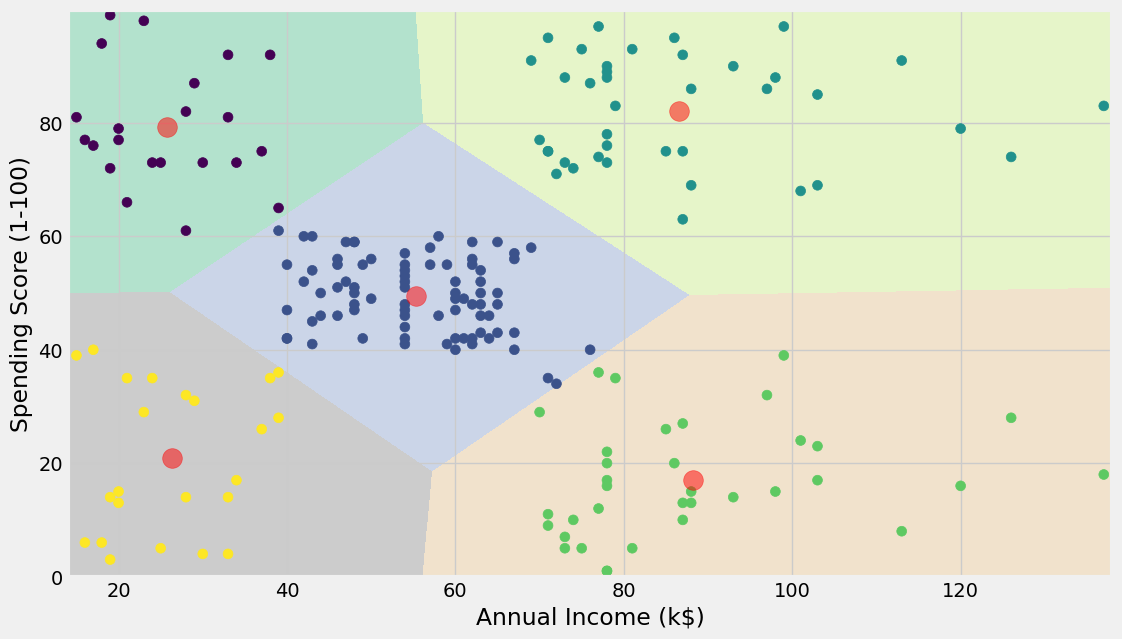

In [43]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 50 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3. Segmentation using Age, Annual Income and Spending Score

Here, we can apply multi-dimensional K-Means Clustering Analysis. The curve of inertia here is harder than the previous ones to interpret, but a visual inspection at the plot is of help in these situations.

The final result can be seen at the second graph below.

In [51]:
X3 = df[['Age' , 'Spending Score (1-100)' ,'Annual Income (k$)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

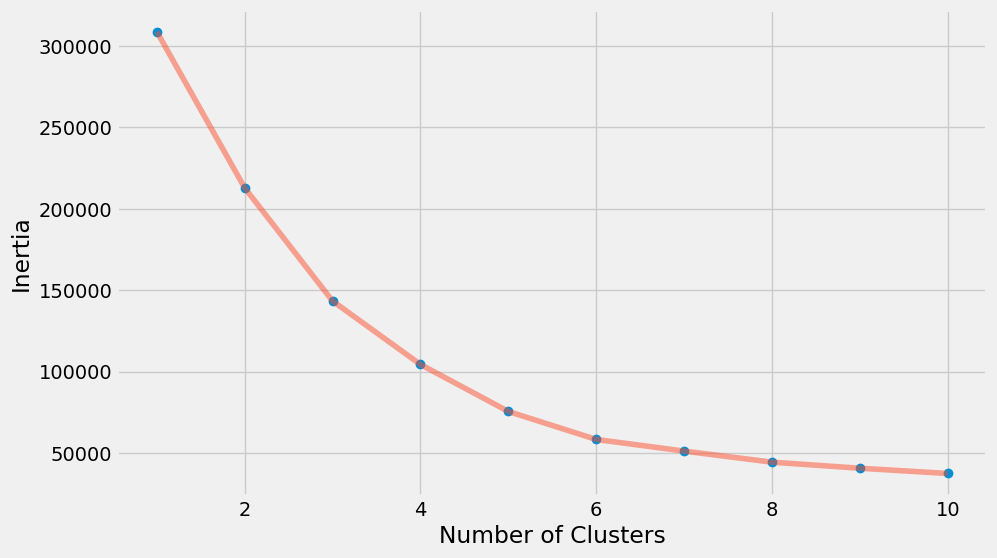

In [52]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [53]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [54]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Annual Income (k$)'],
    z= df['Spending Score (1-100)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 5,
        line=dict(
            color= df['label3'],
            width= 100
        ),
        opacity=0.6
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score (1-100)')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### From the above visual representation graph, we can identify some clusters of clients, from a raw behavioural perspective.

* Cluster 0 (Dark Blue): Young clients (< 40 years old) with low average annual income and average spending score.
* Cluster 1 (Purple): Clients of all ages with high average annual income and average spending score.
* Cluster 2 (Magenta): Clients with high age(> 45 years old), with a an average annual income and average spending score.
* Cluster 3 (Red): Young clients (< 40 years old) with an high annual income and high spending score.
* Cluster 4 (Orange): Clients of all ages, with low annual income and low spending score.
* Cluster 5 (Yellow): Young clients (< 40 years old) with low annual income and average spending score.

## Clustering using Hierarchical Clustering technique 

### Using the dendrogram to find the optimal number of clusters

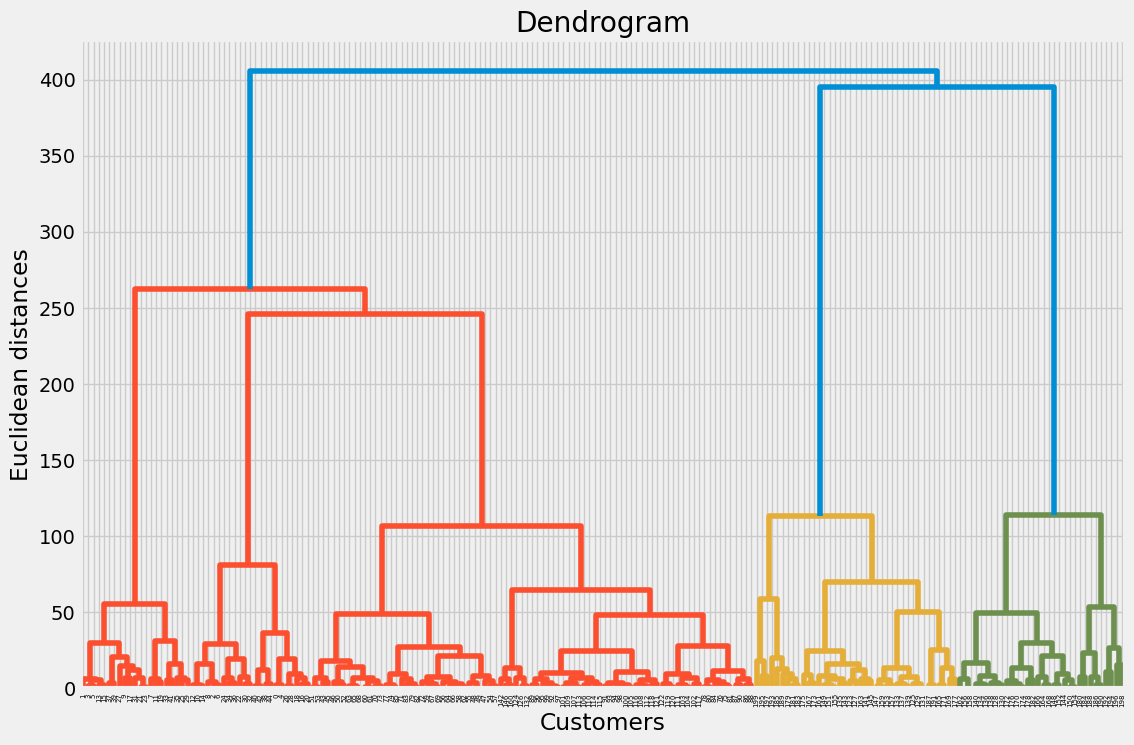

In [44]:
import scipy.cluster.hierarchy as sch

X = df.iloc[:, [3, 4]].values
plt.figure(1 , figsize = (12 ,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram.

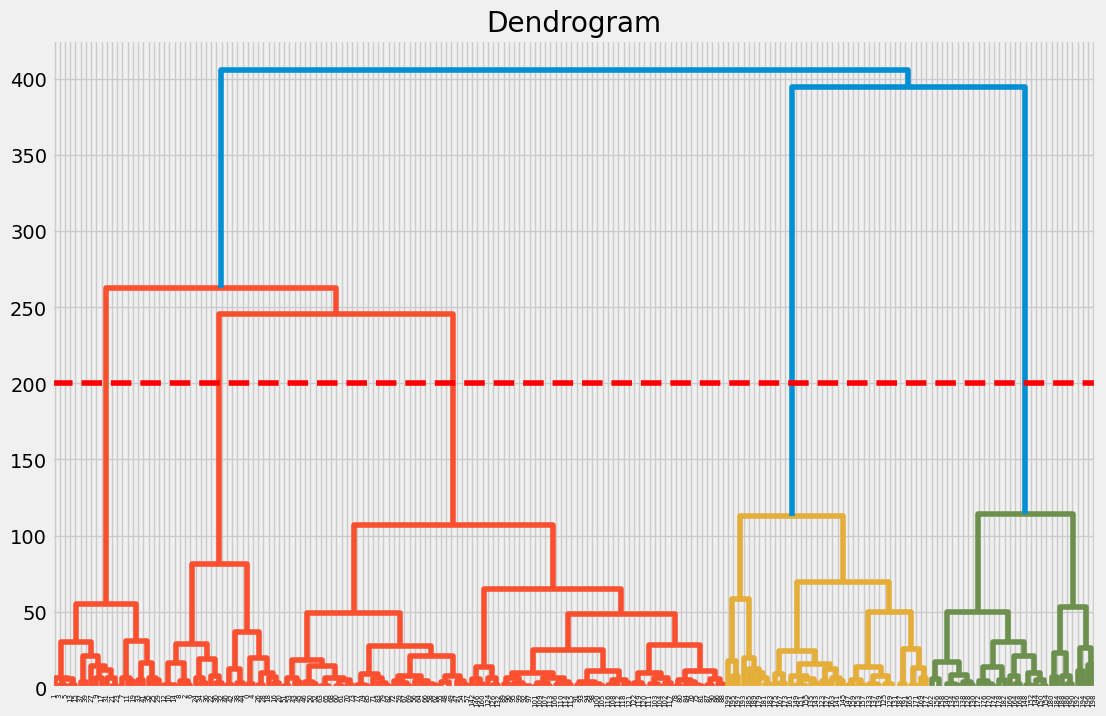

In [45]:
plt.figure(figsize=(12, 8))  
plt.title("Dendrogram")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=200, color='r', linestyle='--')

### Training the Hierarchical Clustering model on the dataset
From Dendrogram, we have five clusters as this line cuts the dendrogram at five points. Let’s now apply hierarchical clustering for 5 clusters. Creating an instance of AgglomerativeClustering using the euclidean distance as the measure of distance between points and ward linkage to calculate the proximity of clusters.

In [46]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualising the clusters
Using shorthand notation to display all the samples belonging to a category as a specific color.

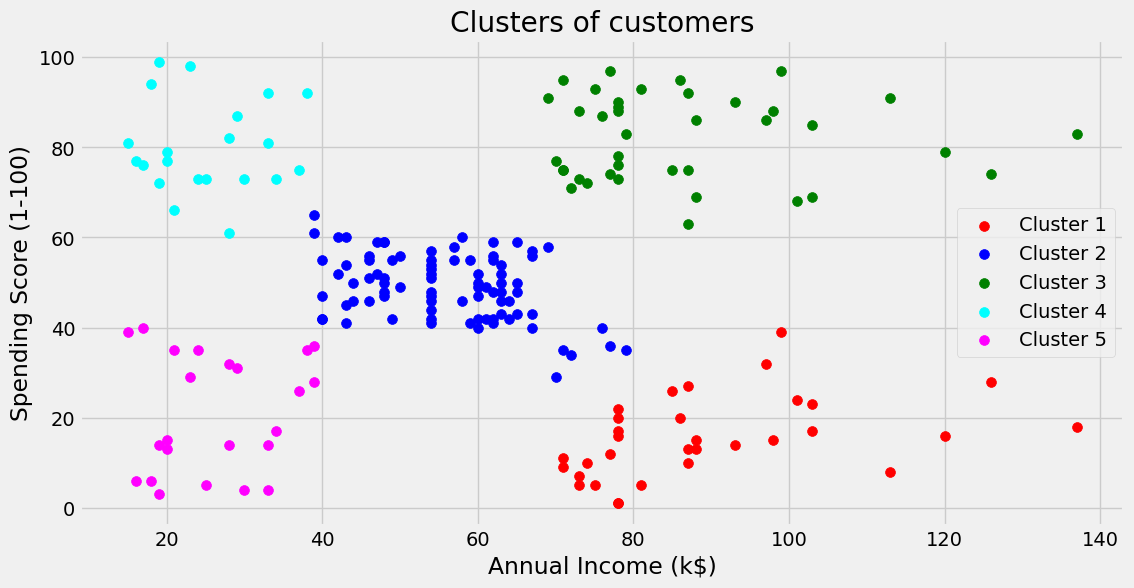

In [47]:
plt.figure(1 , figsize = (12 ,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Yay! We can clearly visualize the five clusters of segmented observations. With the advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means.